In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Cars24 E2E\code\Training_FileFromDB\InputFile.csv')
final_df = df.copy()
final_df.drop(final_df.columns[[0, 5, 6, 8, 9]], axis=1,inplace = True)
#data = final_df.dropna()

In [3]:
final_df.head(5)

,Transmission_Type,Ownership,Fuel_Used,km_driven,selling_price,Age,MRP
0,""" Manual""","""1st Owner""",""" Petrol""",8339,337599,6,472800.0
1,""" Automatic""","""1st Owner""",""" Petrol""",950,1630999,1,1859000.0
2,""" Manual""","""1st Owner""",""" Petrol""",7831,629599,1,687600.0
3,""" Manual""","""2nd Owner""",""" Petrol""",21596,1039099,2,1304929.0
4,""" Manual""","""1st Owner""",""" Petrol""",29438,1039099,2,1304929.0


In [4]:
final_df.rename(columns = {'MRP':'On_Road_Price'}, inplace = True)

In [5]:
final_df.head(5)

,Transmission_Type,Ownership,Fuel_Used,km_driven,selling_price,Age,On_Road_Price
0,""" Manual""","""1st Owner""",""" Petrol""",8339,337599,6,472800.0
1,""" Automatic""","""1st Owner""",""" Petrol""",950,1630999,1,1859000.0
2,""" Manual""","""1st Owner""",""" Petrol""",7831,629599,1,687600.0
3,""" Manual""","""2nd Owner""",""" Petrol""",21596,1039099,2,1304929.0
4,""" Manual""","""1st Owner""",""" Petrol""",29438,1039099,2,1304929.0


In [6]:
final_df['Ownership'].value_counts()

"1st Owner"    3743
"2nd Owner"     889
"3rd Owner"      89
"4th Owner"       6
Name: Ownership, dtype: int64

In [6]:
def one_hot_encoding(df45):
    df55 = df45.copy()
    dfdummies = pd.get_dummies(data=df55,columns=['Transmission_Type','Ownership','Fuel_Used'],drop_first=True)
    return dfdummies

In [7]:
new_df = one_hot_encoding(final_df)
new_df.head(3)

,km_driven,selling_price,Age,On_Road_Price,"Transmission_Type_"" Manual""","Ownership_""2nd Owner""","Ownership_""3rd Owner""","Ownership_""4th Owner""","Fuel_Used_"" Petrol + CNG""","Fuel_Used_"" Petrol + LPG""","Fuel_Used_"" Petrol"""
0,8339,337599,6,472800.0,1,0,0,0,0,0,1
1,950,1630999,1,1859000.0,0,0,0,0,0,0,1
2,7831,629599,1,687600.0,1,0,0,0,0,0,1


In [8]:
X=new_df.iloc[:,[0,2,3,4,5,6,7,8,9,10]]
y=new_df.iloc[:,1]

In [10]:
X

,km_driven,Age,On_Road_Price,"Transmission_Type_"" Manual""","Ownership_""2nd Owner""","Ownership_""3rd Owner""","Ownership_""4th Owner""","Fuel_Used_"" Petrol + CNG""","Fuel_Used_"" Petrol + LPG""","Fuel_Used_"" Petrol"""
0,8339,6,472800.0,1,0,0,0,0,0,1
1,950,1,1859000.0,0,0,0,0,0,0,1
2,7831,1,687600.0,1,0,0,0,0,0,1
3,21596,2,1304929.0,1,1,0,0,0,0,1
4,29438,2,1304929.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4722,102988,8,588000.0,1,0,0,0,0,0,0
4723,104600,7,657600.0,1,0,0,0,0,0,0
4724,27217,5,472800.0,1,0,0,0,0,0,1
4725,22607,5,368400.0,1,1,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
result_df = pd.DataFrame(index=X_test.index, columns=['KNNRegressor','Lasso','Ridge','XGBRegressor','RFRegressor','DT','Actual'])

In [13]:
result_df.Actual = y_test

#### Decison Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
from dmba import plotDecisionTree

In [15]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
#plotDecisionTree(clf, feature_names=X_train.columns, rotate=True)

In [17]:
tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
print("The model training score is" , tree_reg.score(X_train, y_train))

The model training score is 0.9997989304964636


In [18]:
y_pred_tree = tree_reg.predict(X_test)

In [19]:
result_df['DT'] = clf.predict(X_test)
result_df['|DT-Actual|'] = abs(result_df.DT-result_df.Actual)

In [20]:
result_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,|DT-Actual|
4360,NaN,NaN,NaN,NaN,NaN,767599.0,615599,152000.0
3617,NaN,NaN,NaN,NaN,NaN,351899.0,351899,0.0
2038,NaN,NaN,NaN,NaN,NaN,597099.0,591499,5600.0
2409,NaN,NaN,NaN,NaN,NaN,436799.0,327599,109200.0
3670,NaN,NaN,NaN,NaN,NaN,426699.0,629599,202900.0
...,...,...,...,...,...,...,...,...
3798,NaN,NaN,NaN,NaN,NaN,558499.0,598199,39700.0
895,NaN,NaN,NaN,NaN,NaN,778599.0,850099,71500.0
4288,NaN,NaN,NaN,NaN,NaN,435199.0,435199,0.0
2810,NaN,NaN,NaN,NaN,NaN,748599.0,731699,16900.0


In [21]:
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['KNNRegressor','Lasso','Ridge','XGBRegressor','RFRegressor','DT','Actual'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual
ME,0.0,0.0,0.0,0.0,0.0,-5385.689218,0.0
RMSE,0.0,0.0,0.0,0.0,0.0,106421.849916,0.0
MAE,0.0,0.0,0.0,0.0,0.0,58915.529246,0.0
MAPE,0.0,0.0,0.0,0.0,0.0,8.903422,0.0


### Tuned DT

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth': [10,20,30,40,50,60,70], 
    'min_samples_split': [5, 10,15,20,25 ,30,35 ,40], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01,0.1], 
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -8333404728.499382
Initial parameters:  {'criterion': 'squared_error', 'max_depth': 70, 'min_impurity_decrease': 0.001, 'min_samples_split': 20, 'splitter': 'best'}


In [23]:
# Create tuning (validation) set: devide the trainset

X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

print('X_train_s Shape: ', X_train_s.shape)
print('X_tune Shape: ', X_tune.shape)
print('y_train_s Shape: ', y_train_s.shape)
print('y_tune Shape: ', y_tune.shape)

X_train Shape:  (3781, 10)
y_train Shape:  (3781,)
X_train_s Shape:  (3024, 10)
X_tune Shape:  (757, 10)
y_train_s Shape:  (3024,)
y_tune Shape:  (757,)


In [30]:
n=len(y_tune)
random_options = range(1,100)

tune_df = pd.DataFrame(index = random_options,
                       columns=['RSME'])


for random_o in random_options:
    car_dt = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=70,
                           min_samples_split = 20, min_impurity_decrease = 0.001, random_state=random_o)
    car_dt.fit(X_train_s, y_train_s)
    y_tune_predict = car_dt.predict(X_tune)
    RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
    tune_df.at[random_o,'RSME'] = RSME

In [31]:
tune_df.RSME.sort_values()

99      97735.0944
30      97735.0944
61      97735.0944
75      97735.0944
34      97735.0944
          ...     
31    97742.095609
29    97742.095609
28    97742.095609
58    97742.095609
50    97742.095609
Name: RSME, Length: 99, dtype: object

#### Tuned DT

In [32]:
car_dt = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=70,
                           min_samples_split = 20, min_impurity_decrease = 0.001, random_state=99)
car_dt.fit(X_train_s, y_train_s)

#plotDecisionTree(car_dt, feature_names=X_train.columns, rotate=True)

DecisionTreeRegressor(max_depth=70, min_impurity_decrease=0.001,
                      min_samples_split=20, random_state=99)

In [33]:
result_df['DT_tuned'] = car_dt.predict(X_test)
result_df['|DT_tuned-Actual|'] = abs(result_df.DT_tuned-result_df.Actual)

In [34]:
result_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,|DT-Actual|,DT_tuned,|DT_tuned-Actual|
4360,NaN,NaN,NaN,NaN,NaN,767599.0,615599,152000.0,659009.526316,43410.526316
3617,NaN,NaN,NaN,NaN,NaN,351899.0,351899,0.0,354799.000000,2900.000000
2038,NaN,NaN,NaN,NaN,NaN,597099.0,591499,5600.0,565949.000000,25550.000000
2409,NaN,NaN,NaN,NaN,NaN,436799.0,327599,109200.0,390083.210526,62484.210526
3670,NaN,NaN,NaN,NaN,NaN,426699.0,629599,202900.0,417277.571429,212321.428571
...,...,...,...,...,...,...,...,...,...,...
3798,NaN,NaN,NaN,NaN,NaN,558499.0,598199,39700.0,551888.473684,46310.526316
895,NaN,NaN,NaN,NaN,NaN,778599.0,850099,71500.0,778599.000000,71500.000000
4288,NaN,NaN,NaN,NaN,NaN,435199.0,435199,0.0,489592.333333,54393.333333
2810,NaN,NaN,NaN,NaN,NaN,748599.0,731699,16900.0,726999.000000,4700.000000


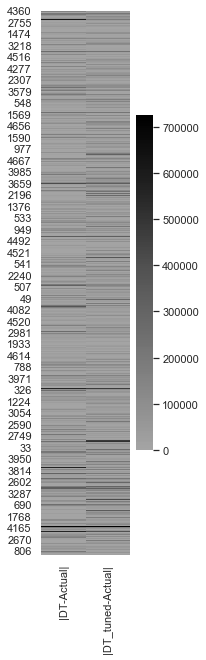

In [35]:
table = result_df[['|DT-Actual|','|DT_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [36]:
m='DT_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,DT_tuned
ME,0.0,0.0,0.0,0.0,0.0,-5385.689218,0.0,-463.338848
RMSE,0.0,0.0,0.0,0.0,0.0,106421.849916,0.0,100018.045757
MAE,0.0,0.0,0.0,0.0,0.0,58915.529246,0.0,63230.707587
MAPE,0.0,0.0,0.0,0.0,0.0,8.903422,0.0,9.709299


#### Implementing XGBoostRegressor

In [37]:
from xgboost import XGBRegressor

In [38]:
xg_reg = XGBRegressor()

In [39]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
result_df['XGBRegressor'] = xg_reg.predict(X_test)
result_df['|XGBRegressor-Actual|'] = abs(result_df.XGBRegressor-result_df.Actual)

In [41]:
result_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,|DT-Actual|,DT_tuned,|DT_tuned-Actual|,|XGBRegressor-Actual|
4360,NaN,NaN,NaN,665066.87500,NaN,767599.0,615599,152000.0,659009.526316,43410.526316,49467.87500
3617,NaN,NaN,NaN,361095.78125,NaN,351899.0,351899,0.0,354799.000000,2900.000000,9196.78125
2038,NaN,NaN,NaN,580672.18750,NaN,597099.0,591499,5600.0,565949.000000,25550.000000,10826.81250
2409,NaN,NaN,NaN,386062.50000,NaN,436799.0,327599,109200.0,390083.210526,62484.210526,58463.50000
3670,NaN,NaN,NaN,448770.15625,NaN,426699.0,629599,202900.0,417277.571429,212321.428571,180828.84375
...,...,...,...,...,...,...,...,...,...,...,...
3798,NaN,NaN,NaN,527481.81250,NaN,558499.0,598199,39700.0,551888.473684,46310.526316,70717.18750
895,NaN,NaN,NaN,842792.75000,NaN,778599.0,850099,71500.0,778599.000000,71500.000000,7306.25000
4288,NaN,NaN,NaN,423475.12500,NaN,435199.0,435199,0.0,489592.333333,54393.333333,11723.87500
2810,NaN,NaN,NaN,751030.43750,NaN,748599.0,731699,16900.0,726999.000000,4700.000000,19331.43750


In [42]:
m='XGBRegressor'
for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,DT_tuned
ME,0.0,0.0,0.0,3079.776923,0.0,-5385.689218,0.0,-463.338848
RMSE,0.0,0.0,0.0,75340.560109,0.0,106421.849916,0.0,100018.045757
MAE,0.0,0.0,0.0,48827.155556,0.0,58915.529246,0.0,63230.707587
MAPE,0.0,0.0,0.0,7.607835,0.0,8.903422,0.0,9.709299


#### Hypertune XGboost

In [43]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [44]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  73070.77241183138


In [45]:
params = { 'max_depth': [7,8,10,11],
           'learning_rate': [0.009,0.0095,0.01,0.15,0.2],
           'subsample': np.arange(0.6, 0.8, 0.090),
           'colsample_bytree': np.arange(0.1,0.9,0.01),
           'colsample_bylevel': np.arange(0.1,0.8,0.09),
           'n_estimators': [800,900,1000,1100,1200]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.69, 'n_estimators': 1100, 'max_depth': 11, 'learning_rate': 0.009, 'colsample_bytree': 0.6099999999999998, 'colsample_bylevel': 0.5499999999999999}
Lowest RMSE:  75487.87334379046


In [46]:
result_df['XGB_tuned'] = clf.predict(X_test)
result_df['|XGB_tuned-Actual|'] = abs(result_df.XGB_tuned-result_df.Actual)

In [47]:
m='XGB_tuned'
metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,DT_tuned,XGB_tuned
ME,0.0,0.0,0.0,3079.776923,0.0,-5385.689218,0.0,-463.338848,2991.806785
RMSE,0.0,0.0,0.0,75340.560109,0.0,106421.849916,0.0,100018.045757,73323.420482
MAE,0.0,0.0,0.0,48827.155556,0.0,58915.529246,0.0,63230.707587,49418.032043
MAPE,0.0,0.0,0.0,7.607835,0.0,8.903422,0.0,9.709299,7.786318


In [48]:
metric_df.columns

Index(['KNNRegressor', 'Lasso', 'Ridge', 'XGBRegressor', 'RFRegressor', 'DT',
       'Actual', 'DT_tuned', 'XGB_tuned'],
      dtype='object')

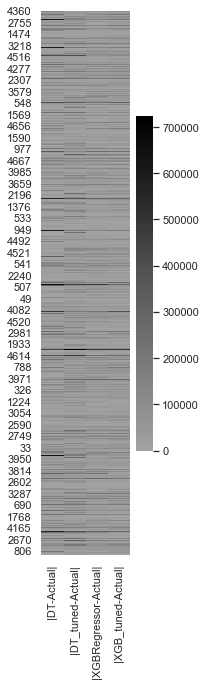

In [49]:
table = result_df[['|DT-Actual|','|DT_tuned-Actual|','|XGBRegressor-Actual|','|XGB_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

#### KNN Regressor

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [51]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 135183.63288656712
RMSE value for k=  2 is: 118586.68405568424
RMSE value for k=  3 is: 113352.60926262997
RMSE value for k=  4 is: 113830.4959069515
RMSE value for k=  5 is: 112844.2559805807
RMSE value for k=  6 is: 111869.6736370238
RMSE value for k=  7 is: 113282.07635927052
RMSE value for k=  8 is: 116439.487366962
RMSE value for k=  9 is: 117346.40884426312
RMSE value for k=  10 is: 118985.51141995832
RMSE value for k=  11 is: 118519.83687377753
RMSE value for k=  12 is: 118190.66432576736
RMSE value for k=  13 is: 118857.17965611751
RMSE value for k=  14 is: 120411.77246716843
RMSE value for k=  15 is: 121213.87109196684
RMSE value for k=  16 is: 121519.735472339
RMSE value for k=  17 is: 122152.95399706345
RMSE value for k=  18 is: 122002.69520570972
RMSE value for k=  19 is: 123363.66598095767
RMSE value for k=  20 is: 124309.72577006675


<AxesSubplot:>

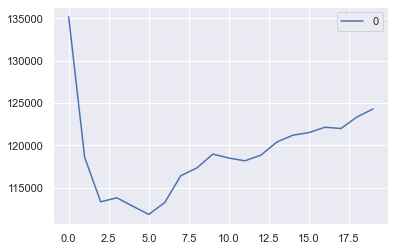

In [53]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [54]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [55]:
result_df['KNNRegressor'] = model.predict(x_test)

In [56]:
result_df['|KNNRegressor_tuned-Actual|'] = abs(result_df.KNNRegressor-result_df.Actual)

In [57]:
result_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,|DT-Actual|,DT_tuned,|DT_tuned-Actual|,|XGBRegressor-Actual|,XGB_tuned,|XGB_tuned-Actual|,|KNNRegressor_tuned-Actual|
4360,673499.000000,NaN,NaN,665066.87500,NaN,767599.0,615599,152000.0,659009.526316,43410.526316,49467.87500,699266.50000,83667.50000,57900.000000
3617,418832.333333,NaN,NaN,361095.78125,NaN,351899.0,351899,0.0,354799.000000,2900.000000,9196.78125,368499.90625,16600.90625,66933.333333
2038,688132.333333,NaN,NaN,580672.18750,NaN,597099.0,591499,5600.0,565949.000000,25550.000000,10826.81250,607628.06250,16129.06250,96633.333333
2409,418465.666667,NaN,NaN,386062.50000,NaN,436799.0,327599,109200.0,390083.210526,62484.210526,58463.50000,398012.71875,70413.71875,90866.666667
3670,610232.333333,NaN,NaN,448770.15625,NaN,426699.0,629599,202900.0,417277.571429,212321.428571,180828.84375,502315.65625,127283.34375,19366.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,516799.000000,NaN,NaN,527481.81250,NaN,558499.0,598199,39700.0,551888.473684,46310.526316,70717.18750,540135.31250,58063.68750,81400.000000
895,750899.000000,NaN,NaN,842792.75000,NaN,778599.0,850099,71500.0,778599.000000,71500.000000,7306.25000,810482.12500,39616.87500,99200.000000
4288,442699.000000,NaN,NaN,423475.12500,NaN,435199.0,435199,0.0,489592.333333,54393.333333,11723.87500,458231.06250,23032.06250,7500.000000
2810,781199.000000,NaN,NaN,751030.43750,NaN,748599.0,731699,16900.0,726999.000000,4700.000000,19331.43750,739663.25000,7964.25000,49500.000000


In [58]:
m='KNNRegressor'
metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,DT_tuned,XGB_tuned
ME,24678.464412,0.0,0.0,3079.776923,0.0,-5385.689218,0.0,-463.338848,2991.806785
RMSE,113352.609263,0.0,0.0,75340.560109,0.0,106421.849916,0.0,100018.045757,73323.420482
MAE,78343.1642,0.0,0.0,48827.155556,0.0,58915.529246,0.0,63230.707587,49418.032043
MAPE,12.053592,0.0,0.0,7.607835,0.0,8.903422,0.0,9.709299,7.786318


#### Ridge Regression

In [59]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10)
ridgecv.fit(StandardScaler().fit_transform(X_train),y_train)

RidgeCV(alphas=array([1.52693098, 8.34463442, 6.17567332, 1.1022691 , 2.17403394,
       7.04552979, 5.35885301, 3.75403334, 8.25866027, 5.31154249,
       7.86054021, 5.09635393, 6.04352012, 5.32455446, 1.67118873,
       7.5334194 , 1.66949687, 9.85078997, 7.19930137, 4.64086199,
       0.89723838, 7.93089912, 0.27632593, 4.90095514, 0.07124541,
       9.71040882, 7.48417601, 2.72969675, 2.07179365, 5.60223772,
       7.20491678, 4.26661646, 7.14640334, 0.28543312, 1.50988224,
       4.07429377, 4.40233955, 0.96530283, 8.76391011, 0.48277247,
       0.80908935, 0.86719113, 6.44159621, 6.27002056, 6.57939976,
       3.94642663, 4.65017685, 6.84760433, 2.38448888, 3.1603183 ]),
        cv=10)

In [60]:
ridgecv.alpha_

9.850789965240837

In [61]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=9.850789965240837)

In [62]:
ridge_model.score(X_test, y_test)

0.7752232884364719

In [63]:
result_df.Ridge = ridge_model.predict(X_test)

In [64]:
result_df['|Ridge-Actual|'] = abs(result_df.Ridge-result_df.Actual)

In [65]:
result_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,|DT-Actual|,DT_tuned,|DT_tuned-Actual|,|XGBRegressor-Actual|,XGB_tuned,|XGB_tuned-Actual|,|KNNRegressor_tuned-Actual|,|Ridge-Actual|
4360,673499.000000,NaN,721194.831748,665066.87500,NaN,767599.0,615599,152000.0,659009.526316,43410.526316,49467.87500,699266.50000,83667.50000,57900.000000,105595.831748
3617,418832.333333,NaN,345379.989957,361095.78125,NaN,351899.0,351899,0.0,354799.000000,2900.000000,9196.78125,368499.90625,16600.90625,66933.333333,6519.010043
2038,688132.333333,NaN,705196.862009,580672.18750,NaN,597099.0,591499,5600.0,565949.000000,25550.000000,10826.81250,607628.06250,16129.06250,96633.333333,113697.862009
2409,418465.666667,NaN,566319.436636,386062.50000,NaN,436799.0,327599,109200.0,390083.210526,62484.210526,58463.50000,398012.71875,70413.71875,90866.666667,238720.436636
3670,610232.333333,NaN,485917.859048,448770.15625,NaN,426699.0,629599,202900.0,417277.571429,212321.428571,180828.84375,502315.65625,127283.34375,19366.666667,143681.140952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,516799.000000,NaN,489220.493677,527481.81250,NaN,558499.0,598199,39700.0,551888.473684,46310.526316,70717.18750,540135.31250,58063.68750,81400.000000,108978.506323
895,750899.000000,NaN,769239.450981,842792.75000,NaN,778599.0,850099,71500.0,778599.000000,71500.000000,7306.25000,810482.12500,39616.87500,99200.000000,80859.549019
4288,442699.000000,NaN,603870.816570,423475.12500,NaN,435199.0,435199,0.0,489592.333333,54393.333333,11723.87500,458231.06250,23032.06250,7500.000000,168671.816570
2810,781199.000000,NaN,730065.012514,751030.43750,NaN,748599.0,731699,16900.0,726999.000000,4700.000000,19331.43750,739663.25000,7964.25000,49500.000000,1633.987486


In [66]:
m='Ridge'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,KNNRegressor,Lasso,Ridge,XGBRegressor,RFRegressor,DT,Actual,DT_tuned,XGB_tuned
ME,24678.464412,0.0,-816.569945,3079.776923,0.0,-5385.689218,0.0,-463.338848,2991.806785
RMSE,113352.609263,0.0,161848.043414,75340.560109,0.0,106421.849916,0.0,100018.045757,73323.420482
MAE,78343.1642,0.0,103400.50655,48827.155556,0.0,58915.529246,0.0,63230.707587,49418.032043
MAPE,12.053592,0.0,16.752699,7.607835,0.0,8.903422,0.0,9.709299,7.786318


In [10]:
import pickle

model_filename = "XGBoost.sav"

xg_boost_model = pickle.load(open(r'C:\Users\ADMIN\Desktop\Cars24 E2E\code\models\XGBoost\XGBoost.sav', 'rb'))

result = xg_boost_model.predict(X_test)

result

array([ 700485.44,  357211.5 ,  623364.4 ,  400272.53,  499444.75,
       1126749.8 ,  921677.56,  579366.8 , 1117780.4 , 1201672.  ,
        621765.2 ,  835727.6 , 1033203.75,  354393.9 , 1743530.6 ,
        398488.53,  521333.84,  545476.25,  409726.2 ,  367679.12,
        498962.94,  885006.8 ,  539953.9 ,  604152.94, 1074419.4 ,
        412689.06,  550994.  ,  804693.56,  342686.84,  504365.06,
        558008.3 , 1720125.5 ,  670955.5 ,  681356.4 ,  621502.94,
        357032.78,  371187.75, 1636794.2 ,  672576.9 ,  609719.9 ,
        681381.  ,  954752.1 ,  802763.06,  591259.7 ,  550239.  ,
        441878.94,  534937.6 ,  510818.7 ,  732739.  ,  548483.6 ,
        322560.1 ,  436314.34,  476975.28,  335817.94,  630204.4 ,
        653603.7 ,  541287.94,  532762.06,  656986.9 ,  329087.  ,
        428860.28,  647171.9 ,  918944.94,  347571.8 ,  253193.4 ,
        317615.28,  613241.3 ,  772857.1 ,  485096.22,  509272.28,
       1315868.  ,  513784.72,  707550.25,  385193.56,  774672

In [14]:
type(X_test)

pandas.core.frame.DataFrame